# **COVID 19 – ESTUDO SOBRE A UTILIZAÇÃO DE GEOREFERENCIADORES PARA AUXILIO NA DETERMINAÇÃO DA NECESSIDADE DE HOSPITAIS DE CAMPANHA**

# **1. Definição do Problema**

## **Onde devemos criar hospitais de campanha na região metropolitana de São Paulo para ajudar a combater o COVID-19 ?**

Com o crescimento da COVID-19 no Brasil, será inevitável a instalações de hospitais de campanha, esse estudo visa apontar os melhores lugares para criação desses hospitais para melhor combater o COVID-19 e reduzir a taxa de mortalidade.

## Sobre a Região Metropolitana de São Paulo

A Região Metropolitana de São Paulo concentra 39 municípios e é o maior polo de riqueza nacional. Criada em 1973, foi reorganizada em 2011 pela LC 1.139 que instituiu o Conselho de Desenvolvimento e agrupou seus municípios em sub-regiões:

**Norte**: Caieiras, Cajamar, Francisco Morato, Franco da Rocha e Mairiporã.

**Leste**: Arujá, Biritiba-Mirim, Ferraz de Vasconcelos, Guararema, Guarulhos, Itaquaquecetuba, Mogi das Cruzes, Poá, Salesópolis, Santa Isabel e Suzano.

**Sudeste**: Diadema, Mauá, Ribeirão Pires, Rio Grande da Serra, Santo André, São Bernardo do Campo e São Caetano do Sul.

**Sudoeste**: Cotia, Embu das Artes, Embu-Guaçu, Itapecerica da Serra, Juquitiba, São Lourenço da Serra, Taboão da Serra e Vargem Grande Paulista.

**Oeste**: Barueri, Carapicuíba, Itapevi, Jandira, Osasco, Pirapora do Bom Jesus e Santana de Parnaíba.

O Município de **São Paulo** integra todas as sub-regiões mencionadas.

# **2. Coleta de Dados**

Para analisar o problema iremos utilizar os seguintes datasets:
*   **municipios_rmsp.csv**: Contém a lista de municípios da região metropolitana de São Paulo (Fonte: EMPLASA - Empresa Paulista de Planejamento Metropolitano S/A)
*   **covid19-cidades-sp.csv**: Contém os casos de COVID-19 (Fonte: Brasil.IO - O Brasil em dados libertos)
*   **dados_populacao_rmsp.csv**: Contém os dados dos municípios de São Paulo (Fonte: Fundação SEADE - Fundação Sistema Estadual de Análise de Dados)
*   **leitos_uti_adulto_covid19.csv**: Contém os dados de leitos de UTI adulto para COVID-19 (Fonte: Ministério da Saúde - Cadastro Nacional de Estabeleciomentos de Saúde)
*   **leitos_uti_pediatrica_covid19.csv**: Contém os dados de leitos de UTI pediatrica para COVID-19 (Fonte: Ministério da Saúde - Cadastro Nacional de Estabeleciomentos de Saúde)
*   **taxa_isolamento_por_municipio_20042020.csv**: Contém os dados de leitos de UTI pediatrica para COVID-19 (Fonte: Sistema de Monitoramento Inteligente do Governo de São Paulo)




In [0]:
#@title Importes neecssários para execução do projeto
#import pandasql as ps

# imports
import numpy as np
import pandas as pd
import os
import warnings

#import pandasql as ps

# plotly packages
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

#configurações
warnings.filterwarnings('ignore')

#avoid truncate text
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None)

In [0]:
#@title Uma amostra dos datasets de origem
# Fonte: https://github.com/datasets/covid-19/tree/master/data
data_municipios_rmsp = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/municipios_rmsp.csv', encoding = "UTF-8")
display(data_municipios_rmsp.head())

# Fonte: https://github.com/datasets/covid-19/tree/master/data
data_time_series = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/covid19-cidades-sp.csv', encoding = "UTF-8")
display(data_time_series.head())

# Fonte: https://www.kaggle.com/hbfree/covid19formattedweatherjan22march24#covid_dataset.csv
data_leitos_adulto = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/leitos_uti_adulto_covid19.csv', encoding = "UTF-8")
display(data_leitos_adulto.head())

# Fonte: https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita
data_leitos_pediatria = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/leitos_uti_pediatrica_covid19.csv', encoding = "UTF-8")
display(data_leitos_pediatria.head())

# Fonte: https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita
data_populacao_rmsp = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/dados_populacao_rmsp.csv', encoding = "UTF-8")
display(data_populacao_rmsp.head())


# Fonte: https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita
data_isolamento_social = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/isolamento_social_municipios.csv', encoding = "UTF-8")
display(data_isolamento_social.head())




,Município,Região,Latitude,Longitude
0,São Paulo,Centro,-23.5505,-46.6333
1,Arujá,Leste,-23.3970,-46.3204
2,Biritiba-Mirim,Leste,-23.5705,-46.0409
3,Ferraz de Vasconcelos,Leste,-23.5290,-46.3636
4,Guararema,Leste,-23.4129,-46.0350


,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-18,SP,Adamantina,city,1,0,True,35068.0,3500105.0,2.85160,NaN
1,2020-04-18,SP,Águas de Lindóia,city,1,1,True,18705.0,3500501.0,5.34616,1.0
2,2020-04-18,SP,Águas de São Pedro,city,1,0,True,3451.0,3500600.0,28.97711,NaN
3,2020-04-18,SP,Agudos,city,5,1,True,37214.0,3500709.0,13.43580,0.2
4,2020-04-18,SP,Alambari,city,1,0,True,6025.0,3500758.0,16.59751,NaN


,CNES,Estabelecimento,Município,Qtd_Leitos_UTI_Adulto,SUS
0,102741,HOSPITAL DE CAMPANHA COVID 19 ARARAQUARA,ARARAQUARA,20,0
1,2082853,HOSPITAL MAJOR ANTONIO CANDIDO BATATAIS,BATATAIS,1,0
2,2083272,HOSPITAL MUNICIPAL DE BERTIOGA,BERTIOGA,10,0
3,9549846,HOSPITAL BRAGANTINO,BRAGANCA PAULISTA,10,0
4,34053,AME AMBULATORIO MEDICO DE ESPECIALIDADES DE CA...,CAMPINAS,35,0


,CNES,Estabelecimento,Município,Qtd_Leitos_UTI_Pediatrica,SUS_Pediatrica
0,92894,HOSPITAL REGIONAL DO LITORAL NORTE,CARAGUATATUBA,10,0
1,5200105,HOSPITAL MUNICIPAL PIMENTAS BONSUCESSO MANUEL ...,GUARULHOS,2,0
2,2083116,SANTA CASA DE MARILIA,MARILIA,3,0
3,2772310,SANTA CASA DE PIRACICABA,PIRACICABA,3,0
4,2081164,HOSPITAL SANTA LYDIA RIBEIRAO PRETO,RIBEIRAO PRETO,2,0


,Área,População,Densidade Demográfica,Taxa Geométrica de Crescimento Anual da População - 2010/2020,Grau de Urbanização,Índice de Envelhecimento,População com Menos de 15 Anos,População com 60 Anos e Mais,Razão de Sexos,municipio
0,"96,17",89.744,"933,18","1,84","96,31","55,76","21,53","12,01","97,25",Arujá
1,"65,70",264.39,"4024,20","0,95","100,00","47,09","23,62","11,12","94,74",Barueri
2,"97,64",100.612,"1030,44","1,54","98,26","60,86","19,69","11,99","96,01",Caieiras
3,"131,39",77.627,"590,81","1,95","98,82","44,85","22,09","9,91","99,14",Cajamar
4,"34,55",394.598,"11421,07","0,66","100,00","58,79","21,98","12,92","94,44",Carapicuíba


,Município,DATA,Índice de isolamento
0,São Paulo,4/1/2020,56%
1,São Paulo,4/2/2020,56%
2,São Paulo,4/3/2020,56%
3,São Paulo,4/4/2020,58%
4,São Paulo,3/5/2020,28%


# **3. Processamento/Tratamento de Dados**

Nesta etapa iremos criar um único dataset resultado da junção de todos os datasets de origem citados na etapa "**2. Coleta de dados**".
Também iremos realizar os tratamentos necessários para que os dados fiquem prontos para serem utilizados como insumos para os modelos de Machine Learning.

Todos esses tratamentos foram realizamos no Knime gerando o dataset final  **dados_consolidados_regiao_metropolitana_sp.csv**

# **4. Análise/Exploração dos Dados**

In [0]:
#@title Dataset resultado da etapa "3. Processamento/Tratamento de Dados" realizados no Knime
# Fonte: https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita
df_final = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/dados_consolidados_regiao_metropolitana_sp.csv', encoding = "iso-8859-1")
#df_final = pd.read_csv('/content/dados_consolidados_regiao_metropolitana_sp.csv', encoding = "iso-8859-1")
display(df_final.head())

,Data,Municipio,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Regiao,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
0,2020-02-25,São Paulo,1,0,3550308,0.00816,0.0,Centro,-23.5505,-46.6333,1521.11,11869660,7803.29,0.54,99.1,82.2,18.99,15.61,90.89,0,957,20,20,0
1,2020-02-26,São Paulo,1,0,3550308,0.00816,0.0,Centro,-23.5505,-46.6333,1521.11,11869660,7803.29,0.54,99.1,82.2,18.99,15.61,90.89,0,957,20,20,0
2,2020-02-27,São Paulo,1,0,3550308,0.00816,0.0,Centro,-23.5505,-46.6333,1521.11,11869660,7803.29,0.54,99.1,82.2,18.99,15.61,90.89,0,957,20,20,0
3,2020-02-28,São Paulo,2,0,3550308,0.01632,0.0,Centro,-23.5505,-46.6333,1521.11,11869660,7803.29,0.54,99.1,82.2,18.99,15.61,90.89,0,957,20,20,0
4,2020-02-29,São Paulo,2,0,3550308,0.01632,0.0,Centro,-23.5505,-46.6333,1521.11,11869660,7803.29,0.54,99.1,82.2,18.99,15.61,90.89,0,957,20,20,0


In [0]:
#@title Tipos das colunas
# Convertemos o campo [Data] de Objeto para datetime para utilizarmos no projeto.
df_final["Data"] = pd.to_datetime(df_final["Data"])
df_final.dtypes

Data                                     datetime64[ns]
Municipio                                        object
Confirmados                                       int64
Mortos                                            int64
Cod_IBGE                                          int64
Confirmados_Por_100K_Habit.                     float64
Rate_Mortos                                     float64
Regiao                                           object
Latitude                                        float64
Longitude                                       float64
Area                                            float64
Populacao                                         int64
Densidade_Demografica                           float64
Tx_Geomet_Cresc_Anual_Popul_2010_2020           float64
Grau_Urbanizacao                                float64
Ind_Envelhecimento                              float64
Popul_Menos_15Anos                              float64
Popul_60Anos_Mais                               

In [0]:
#@title Características dos dados
# Verifica como estão os dados

df_final.describe()

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
count,798.000000,798.000000,7.980000e+02,798.000000,798.000000,798.000000,798.000000,798.000000,7.980000e+02,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.0
mean,162.962406,10.874687,3.530038e+06,10.659960,0.066353,-23.540489,-46.631154,227.346416,9.398060e+05,4346.770777,1.156529,98.021967,65.513709,20.468559,13.013709,95.469311,46.864662,62.652882,1.686717,1.127820,0.0
std,877.012241,62.450417,1.645358e+04,11.629575,0.126631,0.126442,0.239272,349.584250,2.688656e+06,3974.901073,0.609380,3.802863,22.526449,1.924586,2.698907,3.065169,19.724240,219.995331,4.893557,4.616397,0.0
min,0.000000,0.000000,3.503901e+06,0.000000,0.000000,-23.928900,-47.071500,15.330000,2.643900e+04,58.220000,0.140000,81.170000,42.100000,14.660000,9.720000,86.820000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,0.000000,3.515103e+06,1.998908,0.000000,-23.623400,-46.852200,42.490000,1.006120e+05,1030.440000,0.615000,98.260000,52.810000,19.030000,11.230000,94.370000,49.250000,0.000000,0.000000,0.000000,0.0
50%,14.500000,1.000000,3.528502e+06,6.987490,0.030450,-23.539300,-46.633300,97.640000,1.744030e+05,3559.240000,1.080000,100.000000,59.260000,20.750000,12.030000,95.490000,54.000000,0.000000,0.000000,0.000000,0.0
75%,43.000000,2.000000,3.547809e+06,15.242057,0.071775,-23.454300,-46.404200,270.820000,4.329050e+05,7083.270000,1.520000,100.000000,70.730000,21.980000,14.030000,97.217500,58.000000,20.000000,0.000000,0.000000,0.0
max,9428.000000,686.000000,3.556453e+06,76.950560,1.000000,-23.279400,-46.035000,1521.110000,1.186966e+07,13922.070000,2.450000,100.000000,157.500000,23.620000,23.100000,103.630000,71.000000,957.000000,20.000000,20.000000,0.0


In [0]:
#@title ### Vamos Agrupar primeiramente por Região para fazermos as análises
df_norte = df_final.loc[(df_final['Regiao'] =="Norte")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=True)
df_leste = df_final.loc[(df_final['Regiao'] =="Leste")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=True)
df_sudeste = df_final.loc[(df_final['Regiao'] =="Sudeste")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=True)
df_sudoeste = df_final.loc[(df_final['Regiao'] =="Sudoeste")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=True)
df_oeste = df_final.loc[(df_final['Regiao'] =="Oeste")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=True)
df_centro = df_final.loc[(df_final['Regiao'] =="Centro")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=True)


In [0]:
#@title  

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = make_subplots(rows=1, cols=1,subplot_titles=('Casos Confirmados por Zonas da RMSP','',))
fig.append_trace(go.Line(name='Confirmados - Zona Norte', x=df_norte.index, y=df_norte['Confirmados']), row=1, col=1)
fig.append_trace(go.Line(name='Confirmados - Zona Leste', x=df_leste.index, y=df_leste['Confirmados']), row=1, col=1)
fig.append_trace(go.Line(name='Confirmados - Zona Sudeste', x=df_sudeste.index, y=df_sudeste['Confirmados']), row=1, col=1)
fig.append_trace(go.Line(name='Confirmados - Zona Sudoeste', x=df_sudoeste.index, y=df_sudoeste['Confirmados']), row=1, col=1)
fig.append_trace(go.Line(name='Confirmados - Zona Oeste', x=df_oeste.index, y=df_oeste['Confirmados']), row=1, col=1)


fig['layout'].update(layout)

fig.show()

# Podemos ver nesse gráfico que não há relação entre temperatura e casos, 
# pois a temperatura se mantem estável e os casos aumentam exponencialmente

In [0]:
#@title 

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = make_subplots(rows=1, cols=1,subplot_titles=('Número de Óbitos por zonas da RMSP','',))
fig.append_trace(go.Line(name='Mortos - Zona Norte', x=df_norte.index, y=df_norte['Mortos']), row=1, col=1)
fig.append_trace(go.Line(name='Mortos - Zona Leste', x=df_leste.index, y=df_leste['Mortos']), row=1, col=1)
fig.append_trace(go.Line(name='Mortos - Zona Sudeste', x=df_sudeste.index, y=df_sudeste['Mortos']), row=1, col=1)
fig.append_trace(go.Line(name='Mortos - Zona Sudoeste', x=df_sudoeste.index, y=df_sudoeste['Mortos']), row=1, col=1)
fig.append_trace(go.Line(name='Mortos - Zona Oeste', x=df_oeste.index, y=df_oeste['Mortos']), row=1, col=1)


fig['layout'].update(layout)

fig.show()

# Podemos ver nesse gráfico que não há relação entre temperatura e casos, 
# pois a temperatura se mantem estável e os casos aumentam exponencialmente

Podemos verificar que embora tenhamos um maior número de casos confirmados na região sudeste com 868 casos contra 862 casos na região leste, a região que tem mais mortes é a zona leste com 48 mortes contra 45 mortes da região sudeste. 

In [0]:
#@title 

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = make_subplots(rows=1, cols=2,subplot_titles=('Zona Sudeste','Zona Leste',))
fig.append_trace(go.Line(name='Confirmados - Zona Sudeste', x=df_sudeste.index, y=df_sudeste['Confirmados']), row=1, col=1)
fig.append_trace(go.Line(name='Mortos - Zona Sudeste', x=df_sudeste.index, y=df_sudeste['Mortos']), row=1, col=1)
fig.append_trace(go.Line(name='Confirmados - Zona Leste', x=df_leste.index, y=df_leste['Confirmados']), row=1, col=2)
fig.append_trace(go.Line(name='Mortos - Zona Leste', x=df_leste.index, y=df_leste['Mortos']), row=1, col=2)


fig['layout'].update(layout)

fig.show()

# Podemos ver nesse gráfico que não há relação entre temperatura e casos, 
# pois a temperatura se mantem estável e os casos aumentam exponencialmente

In [0]:
#@title Separamos as principais características por cidades e por região RMSP

df_cidades = df_final.groupby(['Regiao','Municipio'])['Area','Populacao','Densidade_Demografica','Tx_Geomet_Cresc_Anual_Popul_2010_2020',
'Grau_Urbanizacao','Ind_Envelhecimento','Popul_Menos_15Anos','Popul_60Anos_Mais','Razao_Sexos','Total_Leitos_UTI_Adulto',
'Total_Leitos_UTI_Pediatrica','Total_SUS','Total_SUS_Pediatrica'].agg('max')

# vamos agrupar por região
df_regiao = df_cidades.groupby('Regiao').agg('mean')

In [0]:
#@title Comparação das características por Região
display(df_regiao.style.background_gradient(cmap='Blues'))


,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Regiao,,,,,,,,,,,,,
Centro,1521.110000,11869660.000000,7803.290000,0.540000,99.100000,82.200000,18.990000,15.610000,90.890000,957.000000,20.000000,20.000000,0.000000
Leste,233.024444,325400.555556,2795.778889,1.215556,94.076667,60.762222,20.947778,12.663333,96.438889,2.888889,0.222222,0.000000,0.000000
Norte,146.302000,120693.000000,1326.854000,1.644000,96.238000,55.790000,20.794000,11.448000,99.504000,0.000000,0.000000,0.000000,0.000000
Oeste,74.210000,266908.333333,6109.396667,1.221667,100.000000,54.821667,21.560000,11.718333,95.273333,5.500000,0.000000,0.000000,0.000000
Sudeste,118.385714,384370.000000,5566.045714,0.608571,99.770000,88.057143,18.244286,15.475714,93.582857,28.428571,2.000000,0.000000,0.000000
Sudoeste,183.688571,125601.285714,3056.380000,1.345714,97.472857,54.685714,21.908571,11.942857,96.954286,0.285714,0.000000,0.000000,0.000000


In [0]:
#@title Comparação das características por cidades
display(df_cidades.style.background_gradient(cmap='Blues'))

## Verificando quais dados tem correlação com a quantidade de contaminados e mortos

Abaixo uma pequena explicação de como interpretar o coeficiente de correlação:

![alt text](https://github.com/matheuxrp/hello-word/blob/master/Screenshot%20from%202020-04-11%2016-39-28.png?raw=true)

## Verificando quais variáveis tem maior correlação com os dados de Contaminados e Mortos

Utilizando a métrica descrita no início dessa sessão, podemos utilizar o método 'corr' ,para demonstrar quais variáveis tem maior correlação com outras.

In [0]:
#@title Correlação entre variáveis da região Norte
display(df_norte.corr().style.background_gradient(cmap='Blues'))

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Confirmados,1.000000,0.936525,0.638970,0.999192,0.666498,-0.638875,-0.638997,0.554394,0.663648,0.691754,0.615344,0.641277,0.627788,0.644338,0.635216,0.637846,0.589363,nan,nan,nan,nan
Mortos,0.936525,1.000000,0.701429,0.945797,0.848192,-0.701311,-0.701462,0.600723,0.732278,0.770319,0.672695,0.704272,0.687867,0.708054,0.696869,0.700045,0.648370,nan,nan,nan,nan
Cod_IBGE,0.638970,0.701429,1.000000,0.658288,0.819443,-1.000000,-0.999999,0.961965,0.993654,0.952476,0.996521,0.999939,0.998000,0.999658,0.999470,0.999983,0.967366,nan,nan,nan,nan
Confirmados_Por_100K_Habit.,0.999192,0.945797,0.658288,1.000000,0.688020,-0.658194,-0.658317,0.573208,0.682659,0.709593,0.634720,0.660581,0.647078,0.663629,0.654514,0.657174,0.608297,nan,nan,nan,nan
Rate_Mortos,0.666498,0.848192,0.819443,0.688020,1.000000,-0.819316,-0.819485,0.705017,0.853832,0.893942,0.787100,0.822556,0.804061,0.826837,0.814218,0.817965,0.809582,nan,nan,nan,nan
Latitude,-0.638875,-0.701311,-1.000000,-0.658194,-0.819316,1.000000,1.000000,-0.961935,-0.993617,-0.952384,-0.996539,-0.999939,-0.997977,-0.999662,-0.999454,-0.999984,-0.967371,nan,nan,nan,nan
Longitude,-0.638997,-0.701462,-0.999999,-0.658317,-0.819485,1.000000,1.000000,-0.961769,-0.993664,-0.952528,-0.996498,-0.999945,-0.997938,-0.999678,-0.999435,-0.999982,-0.967358,nan,nan,nan,nan
Area,0.554394,0.600723,0.961965,0.573208,0.705017,-0.961935,-0.961769,1.000000,0.930767,0.845571,0.979062,0.959404,0.976170,0.954614,0.968902,0.962552,0.936649,nan,nan,nan,nan
Populacao,0.663648,0.732278,0.993654,0.682659,0.853832,-0.993617,-0.993664,0.930767,1.000000,0.978884,0.980943,0.994309,0.987704,0.995462,0.991756,0.993381,0.958492,nan,nan,nan,nan
Densidade_Demografica,0.691754,0.770319,0.952476,0.709593,0.893942,-0.952384,-0.952528,0.845571,0.978884,1.000000,0.924792,0.955060,0.938480,0.958677,0.947552,0.951299,0.914352,nan,nan,nan,nan


In [0]:
#@title Correlação entre variáveis da região Leste
display(df_leste.corr().style.background_gradient(cmap='Blues'))

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Confirmados,1.000000,0.988139,0.693196,0.997943,0.762639,-0.693100,-0.692944,0.677578,0.523828,0.591103,0.704808,0.683417,0.702729,0.691330,0.700323,0.697418,0.545043,0.441886,0.305629,nan,nan
Mortos,0.988139,1.000000,0.636449,0.984951,0.795649,-0.636370,-0.636205,0.622745,0.476433,0.537826,0.647554,0.627070,0.646018,0.634536,0.643605,0.640504,0.489672,0.405806,0.277076,nan,nan
Cod_IBGE,0.693196,0.636449,1.000000,0.691821,0.654566,-1.000000,-1.000000,0.992308,0.931988,0.983936,0.999105,0.999831,0.999762,0.999978,0.999869,0.999969,0.965617,0.758685,0.669746,nan,nan
Confirmados_Por_100K_Habit.,0.997943,0.984951,0.691821,1.000000,0.748580,-0.691717,-0.691574,0.675776,0.524388,0.592296,0.703185,0.682225,0.700927,0.690063,0.698628,0.695956,0.543909,0.439787,0.305385,nan,nan
Rate_Mortos,0.762639,0.795649,0.654566,0.748580,1.000000,-0.654472,-0.654407,0.639396,0.531767,0.598907,0.660330,0.648877,0.659185,0.653801,0.658098,0.656915,0.535287,0.425001,0.324175,nan,nan
Latitude,-0.693100,-0.636370,-1.000000,-0.691717,-0.654472,1.000000,1.000000,-0.992345,-0.932113,-0.983974,-0.999102,-0.999840,-0.999766,-0.999976,-0.999872,-0.999965,-0.965708,-0.758904,-0.670014,nan,nan
Longitude,-0.692944,-0.636205,-1.000000,-0.691574,-0.654407,1.000000,1.000000,-0.992293,-0.932165,-0.984026,-0.999107,-0.999841,-0.999750,-0.999980,-0.999861,-0.999966,-0.965718,-0.759005,-0.670143,nan,nan
Area,0.677578,0.622745,0.992308,0.675776,0.639396,-0.992345,-0.992293,1.000000,0.949522,0.975274,0.988169,0.992748,0.993181,0.991686,0.992818,0.991870,0.963611,0.788458,0.705879,nan,nan
Populacao,0.523828,0.476433,0.931988,0.524388,0.531767,-0.932113,-0.932165,0.949522,1.000000,0.954477,0.920159,0.936797,0.929320,0.931698,0.929628,0.929947,0.948040,0.922991,0.882640,nan,nan
Densidade_Demografica,0.591103,0.537826,0.983936,0.592296,0.598907,-0.983974,-0.984026,0.975274,0.954477,1.000000,0.979041,0.986526,0.981028,0.984500,0.981900,0.982758,0.984345,0.787533,0.720790,nan,nan


In [0]:
#@title Correlação entre variáveis da região Oeste
display(df_oeste.corr().style.background_gradient(cmap='Blues'))

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Confirmados,1.000000,0.983355,0.691081,0.999427,0.872320,-0.690991,-0.691045,0.684077,0.654282,0.659497,0.728691,0.690951,0.680359,0.690379,0.679993,0.692230,0.649476,0.562817,nan,nan,nan
Mortos,0.983355,1.000000,0.595727,0.978050,0.858395,-0.595646,-0.595695,0.589471,0.562873,0.567542,0.629876,0.595610,0.586111,0.595104,0.585788,0.596759,0.549768,0.482282,nan,nan,nan
Cod_IBGE,0.691081,0.595727,1.000000,0.705829,0.745155,-1.000000,-1.000000,0.997908,0.990301,0.993146,0.985024,1.000000,0.999228,0.999969,0.999261,0.999990,0.984412,0.923870,nan,nan,nan
Confirmados_Por_100K_Habit.,0.999427,0.978050,0.705829,1.000000,0.871541,-0.705738,-0.705792,0.698838,0.669075,0.674181,0.743142,0.705698,0.695130,0.705111,0.694746,0.706975,0.664545,0.576947,nan,nan,nan
Rate_Mortos,0.872320,0.858395,0.745155,0.871541,1.000000,-0.745076,-0.745111,0.740252,0.719312,0.721235,0.767516,0.745045,0.737771,0.744359,0.737208,0.745929,0.723473,0.642012,nan,nan,nan
Latitude,-0.690991,-0.595646,-1.000000,-0.705738,-0.745076,1.000000,1.000000,-0.997892,-0.990308,-0.993186,-0.984984,-1.000000,-0.999234,-0.999972,-0.999271,-0.999990,-0.984396,-0.923830,nan,nan,nan
Longitude,-0.691045,-0.595695,-1.000000,-0.705792,-0.745111,1.000000,1.000000,-0.997886,-0.990278,-0.993166,-0.985020,-1.000000,-0.999225,-0.999973,-0.999263,-0.999990,-0.984393,-0.923754,nan,nan,nan
Area,0.684077,0.589471,0.997908,0.698838,0.740252,-0.997892,-0.997886,1.000000,0.990416,0.989343,0.978745,0.997895,0.997907,0.997753,0.997688,0.997739,0.986384,0.940443,nan,nan,nan
Populacao,0.654282,0.562873,0.990301,0.669075,0.719312,-0.990308,-0.990278,0.990416,1.000000,0.996718,0.954791,0.990320,0.994775,0.989889,0.994299,0.989751,0.975183,0.958823,nan,nan,nan
Densidade_Demografica,0.659497,0.567542,0.993146,0.674181,0.721235,-0.993186,-0.993166,0.989343,0.996718,1.000000,0.962019,0.993198,0.996296,0.993246,0.996459,0.992782,0.974704,0.936441,nan,nan,nan


In [0]:
#@title Correlação entre variáveis da região Sudeste
display(df_sudeste.corr().style.background_gradient(cmap='Blues'))

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Confirmados,1.000000,0.963788,0.827010,0.999581,0.844808,-0.826814,-0.826370,0.742044,0.684139,0.683631,0.899617,0.826600,0.795070,0.830574,0.803000,0.829509,0.472123,0.624750,nan,nan,nan
Mortos,0.963788,1.000000,0.707072,0.962482,0.863203,-0.706920,-0.706542,0.628547,0.585755,0.587550,0.772368,0.706733,0.677284,0.710767,0.684823,0.709256,0.384828,0.537826,nan,nan,nan
Cod_IBGE,0.827010,0.707072,1.000000,0.824688,0.778219,-0.999999,-0.999997,0.977204,0.948252,0.937212,0.963246,0.999999,0.995909,0.999769,0.997819,0.999977,0.796678,0.897521,nan,nan,nan
Confirmados_Por_100K_Habit.,0.999581,0.962482,0.824688,1.000000,0.833935,-0.824479,-0.824018,0.740490,0.678112,0.676799,0.899263,0.824259,0.793036,0.828054,0.800795,0.827250,0.468534,0.616813,nan,nan,nan
Rate_Mortos,0.844808,0.863203,0.778219,0.833935,1.000000,-0.778379,-0.778525,0.739630,0.773210,0.777375,0.741307,0.778416,0.766442,0.781376,0.771265,0.777780,0.602685,0.758413,nan,nan,nan
Latitude,-0.826814,-0.706920,-0.999999,-0.824479,-0.778379,1.000000,0.999999,-0.977181,-0.948542,-0.937554,-0.963082,-1.000000,-0.995901,-0.999780,-0.997820,-0.999971,-0.796844,-0.897952,nan,nan,nan
Longitude,-0.826370,-0.706542,-0.999997,-0.824018,-0.778525,0.999999,1.000000,-0.977279,-0.948978,-0.938020,-0.962750,-1.000000,-0.995944,-0.999781,-0.997859,-0.999960,-0.797315,-0.898544,nan,nan,nan
Area,0.742044,0.628547,0.977204,0.740490,0.739630,-0.977181,-0.977279,1.000000,0.947921,0.924203,0.899721,0.977252,0.992386,0.972906,0.988986,0.976318,0.867741,0.889030,nan,nan,nan
Populacao,0.684139,0.585755,0.948252,0.678112,0.773210,-0.948542,-0.948978,0.947921,1.000000,0.997061,0.838363,0.948718,0.953990,0.949035,0.955126,0.946173,0.861420,0.988492,nan,nan,nan
Densidade_Demografica,0.683631,0.587550,0.937212,0.676799,0.777375,-0.937554,-0.938020,0.924203,0.997061,1.000000,0.831329,0.937731,0.937578,0.939605,0.940475,0.935133,0.836619,0.994943,nan,nan,nan


In [0]:
#@title Correlação entre Confirmados e Mortos do Centro
teste = df_centro[['Confirmados','Mortos','Area','Populacao','Densidade_Demografica','Tx_Geomet_Cresc_Anual_Popul_2010_2020',
                  'Grau_Urbanizacao','Ind_Envelhecimento','Popul_Menos_15Anos','Popul_60Anos_Mais','Razao_Sexos','Ind_Isolamento(%)']]

                  
display(df_centro.corr()[['Confirmados','Mortos']].style.background_gradient(cmap='Blues'))

,Confirmados,Mortos
Confirmados,1.000000,0.997266
Mortos,0.997266,1.000000
Cod_IBGE,nan,nan
Confirmados_Por_100K_Habit.,1.000000,0.997266
Rate_Mortos,0.815503,0.796396
Latitude,0.000000,0.000000
Longitude,0.000000,-0.000000
Area,0.000000,-0.000000
Populacao,nan,nan
Densidade_Demografica,0.000000,0.000000


In [0]:
#@title Correlação entre variáveis da região Sudoeste
display(df_sudoeste.corr().style.background_gradient(cmap='Blues'))

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Confirmados,1.000000,0.983291,0.811563,0.999508,0.417247,-0.813686,-0.812450,0.893050,0.729575,0.506458,0.707058,0.804044,0.839498,0.803751,0.831069,0.818101,0.545241,0.532660,nan,nan,nan
Mortos,0.983291,1.000000,0.858108,0.983111,0.456299,-0.859970,-0.858869,0.890396,0.785512,0.578209,0.764568,0.852276,0.882910,0.850749,0.875073,0.863531,0.616108,0.481697,nan,nan,nan
Cod_IBGE,0.811563,0.858108,1.000000,0.811436,0.608181,-0.999990,-0.999998,0.849896,0.980191,0.885703,0.981618,0.999745,0.997653,0.999832,0.998795,0.999892,0.875409,0.367557,nan,nan,nan
Confirmados_Por_100K_Habit.,0.999508,0.983111,0.811436,1.000000,0.432069,-0.813584,-0.812336,0.902121,0.725586,0.504048,0.705617,0.803438,0.840129,0.803575,0.831678,0.818065,0.539986,0.553302,nan,nan,nan
Rate_Mortos,0.417247,0.456299,0.608181,0.432069,1.000000,-0.607517,-0.607902,0.592914,0.543504,0.676721,0.616088,0.601289,0.610165,0.610798,0.615005,0.604130,0.485166,0.564302,nan,nan,nan
Latitude,-0.813686,-0.859970,-0.999990,-0.813584,-0.607517,1.000000,0.999997,-0.851767,-0.979618,-0.883857,-0.980772,-0.999667,-0.997908,-0.999755,-0.998968,-0.999941,-0.873937,-0.369771,nan,nan,nan
Longitude,-0.812450,-0.858869,-0.999998,-0.812336,-0.607902,0.999997,1.000000,-0.850741,-0.979950,-0.884913,-0.981266,-0.999712,-0.997758,-0.999804,-0.998869,-0.999916,-0.874817,-0.368620,nan,nan,nan
Area,0.893050,0.890396,0.849896,0.902121,0.592914,-0.851767,-0.850741,1.000000,0.753063,0.570984,0.749297,0.838101,0.873896,0.845143,0.869486,0.856242,0.585908,0.766627,nan,nan,nan
Populacao,0.729575,0.785512,0.980191,0.725586,0.543504,-0.979618,-0.979950,0.753063,1.000000,0.930072,0.985327,0.983574,0.965963,0.982535,0.969882,0.978296,0.941725,0.226382,nan,nan,nan
Densidade_Demografica,0.506458,0.578209,0.885703,0.504048,0.676721,-0.883857,-0.884913,0.570984,0.930072,1.000000,0.944440,0.891867,0.857791,0.892305,0.866962,0.878970,0.931075,0.123799,nan,nan,nan


## Vamos verificar a Distribuição dos dados utilizando o gráfico de Histograma

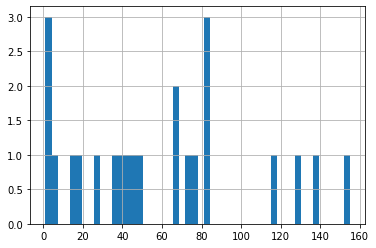

In [0]:
#@title Histograma da quantidade de Contaminados na região norte
df_norte['Confirmados'].hist(bins=50) #bins = quantidade de linhas do histagram

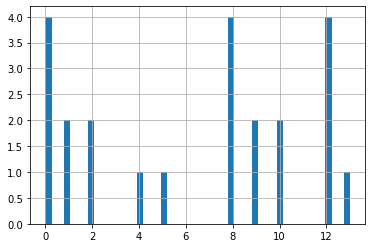

In [0]:
#@title Histograma da quantidade de Mortos na região norte

import numpy as np
import matplotlib.pyplot as plt
#df_hist_norte = df_norte['Mortos','Confirmados']
df_norte['Mortos'].hist(bins=50)#(bins=12, alpha=0.5) #, figsize=(100,200))

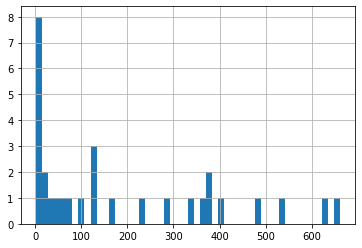

In [0]:
#@title Histograma da quantidade de Contaminados na região Leste
df_leste.Confirmados.hist(bins=50)

In [0]:
#@title Verifica se o dataset da região norte é uma distribuição normal
from scipy.stats import normaltest
display('Confirmados da Região Norte')
display(normaltest(df_norte.Confirmados))
display('Mortos da Região Norte')
display(normaltest(df_norte.Mortos))

'Confirmados da Região Norte'

NormaltestResult(statistic=1.6788016801527874, pvalue=0.4319692645792407)

'Mortos da Região Norte'

NormaltestResult(statistic=10.626152916919773, pvalue=0.004926746448128341)

## **Diagrama de Dispersão**

O diagrama de dispersão é conhecido como uma das principais ferramentas da qualidade que podem ser utilizadas por uma empresa.

Trata-se de uma representação gráfica que analisa a relação entre duas variáveis quantitativas — uma de causa e uma de efeito. 
Quando você tem uma hipótese do que causou algo, mas ainda deseja comprová-la por meio de uma análise mais aprofundada.

Esse tipo de diagrama traz números simultâneos das duas variáveis, deixando visível se o que acontece em uma variável 
causou interferência na outra. Ao estudar a correlação, você tem uma variável dependente Y (efeito), que se relaciona 
a variáveis independentes X (causas).

O modelo hipotético seria, portanto, y = f (x).

Ainda não entendeu o que é diagrama de dispersão? Calma, logo mais daremos um exemplo. Mas, ainda sobre a definição do termo, 
você deve saber que essa correlação criada com base no diagrama pode ser:

Positiva: quando os pontos se unem em uma linha crescente. Isso quer dizer que, assim que uma variável aumenta, a outra também cresce;
Negativa: quando os pontos se unem em uma linha decrescente. O que significa que, à medida que uma variável aumenta, a outra diminui;
Nula: quando os pontos estão bem dispersos e, portanto, indica que não há correlação aparente entre as duas variáveis.


In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_norte,x='Confirmados',y='Densidade_Demografica',width=600,height=400,title='Região Norte')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_norte,x='Mortos',y='Densidade_Demografica',width=600,height=400,title='Região Norte')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_leste,x='Confirmados',y='Tx_Geomet_Cresc_Anual_Popul_2010_2020',width=600,height=400,title='Região Leste')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_leste,x='Mortos',y='Tx_Geomet_Cresc_Anual_Popul_2010_2020',width=600,height=400,title='Região Leste')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_oeste,x='Confirmados',y='Tx_Geomet_Cresc_Anual_Popul_2010_2020',width=600,height=400,title='Região Oeste')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_oeste,x='Mortos',y='Tx_Geomet_Cresc_Anual_Popul_2010_2020',width=600,height=400,title='Região Oeste')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_sudeste,x='Confirmados',y='Tx_Geomet_Cresc_Anual_Popul_2010_2020',width=600,height=400,title='Região Sudeste')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_sudeste,x='Mortos',y='Tx_Geomet_Cresc_Anual_Popul_2010_2020',width=600,height=400,title='Região Sudeste')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_sudoeste,x='Confirmados',y='Area',width=600,height=400,title='Região Sudoeste')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_sudoeste,x='Mortos',y='Area',width=600,height=400,title='Região Sudoeste')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_centro,x='Confirmados',y='Ind_Isolamento(%)',width=600,height=400,title='Região Central')
display(fig.show())

None

In [0]:
#@ title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px

fig = px.scatter(df_sudeste,x='Mortos',y='Ind_Isolamento(%)',width=600,height=400,title='Região Central')
display(fig.show())

None

In [0]:
df_norte_cidades = df_final.loc[df_final['Regiao'] == 'Norte' ] # Represent only large countries

fig = px.pie(df_norte_cidades, values='Confirmados', 
             names='Municipio', 
             title='Confirmados da Região Norte', 
             width=600, height=500).show()

In [0]:
df_norte_cidades = df_final.loc[df_final['Regiao'] == 'Norte' ] # Represent only large countries

fig = px.pie(df_norte_cidades, values='Mortos', 
             names='Municipio', 
             title='Mortos da Região Norte', 
             width=600, height=500).show()

In [0]:
df_leste_cidades = df_final.loc[df_final['Regiao'] == 'Leste' ] # Represent only large countries

fig = px.pie(df_leste_cidades, values='Confirmados', 
             names='Municipio', 
             title='Confirmados da Região Leste', 
             width=600, height=500).show()

In [0]:
df_leste_cidades = df_final.loc[df_final['Regiao'] == 'Leste' ] # Represent only large countries

fig = px.pie(df_leste_cidades, values='Mortos', 
             names='Municipio', 
             title='Mortos da Região Leste', 
             width=600, height=500).show()

In [0]:
df_oeste_cidades = df_final.loc[df_final['Regiao'] == 'Oeste' ] # Represent only large countries

fig = px.pie(df_oeste_cidades, values='Confirmados', 
             names='Municipio', 
             title='Confirmados da Região Oeste', 
             width=600, height=500).show()

In [0]:
df_oeste_cidades = df_final.loc[df_final['Regiao'] == 'Oeste' ] # Represent only large countries

fig = px.pie(df_oeste_cidades, values='Mortos', 
             names='Municipio', 
             title='Mortos da Região Oeste', 
             width=600, height=500).show()

In [0]:
df_sudeste_cidades = df_final.loc[df_final['Regiao'] == 'Sudeste' ] # Represent only large countries

fig = px.pie(df_sudeste_cidades, values='Confirmados', 
             names='Municipio', 
             title='Confirmados da Região Sudeste', 
             width=600, height=500).show()

In [0]:
df_sudeste_cidades = df_final.loc[df_final['Regiao'] == 'Sudeste' ] # Represent only large countries

fig = px.pie(df_sudeste_cidades, values='Mortos', 
             names='Municipio', 
             title='Mortos da Região Sudeste', 
             width=600, height=500).show()

In [0]:
df_sudoeste_cidades = df_final.loc[df_final['Regiao'] == 'Sudoeste' ] # Represent only large countries

fig = px.pie(df_sudoeste_cidades, values='Confirmados', 
             names='Municipio', 
             title='Confirmados da Região Sudoeste', 
             width=600, height=500).show()

In [0]:
df_sudoeste_cidades = df_final.loc[df_final['Regiao'] == 'Sudoeste' ] # Represent only large countries

fig = px.pie(df_sudoeste_cidades, values='Mortos', 
             names='Municipio', 
             title='Mortos da Região Sudoeste', 
             width=600, height=500).show()

In [0]:
df_centro_cidades = df_final.loc[df_final['Regiao'] == 'Centro' ] # Represent only large countries

fig = px.pie(df_centro_cidades, values='Confirmados', 
             names='Municipio', 
             title='Confirmados da Região Central', 
             width=600, height=500).show()

In [0]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(df_norte_cidades, x="Data", y="Confirmados", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Confirmados da Região Norte').show()

In [0]:


fig = px.bar(df_norte_cidades, x="Data", y="Mortos", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Mortos da Região Norte').show()

In [0]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(df_leste_cidades, x="Data", y="Confirmados", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Confirmados da Região Leste').show()

In [0]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(df_leste_cidades, x="Data", y="Mortos", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Mortos da Região Leste').show()

In [0]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(df_oeste_cidades, x="Data", y="Confirmados", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Confirmados da Região Oeste').show()

In [0]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(df_oeste_cidades, x="Data", y="Mortos", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Mortos da Região Oeste').show()

In [0]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(df_sudeste_cidades, x="Data", y="Confirmados", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Confirmados da Região Sudeste').show()

In [0]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(df_sudeste_cidades, x="Data", y="Mortos", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Mortos da Região Sudeste').show()

In [0]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(df_sudoeste_cidades, x="Data", y="Confirmados", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Confirmados da Região Sudoeste').show()

In [0]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(df_sudoeste_cidades, x="Data", y="Mortos", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Mortos da Região Sudoeste').show()

In [0]:
import plotly.express as px

fig = px.bar(df_centro_cidades, x="Data", y="Confirmados", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Confirmados da Região Central').show()

In [0]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(df_centro_cidades, x="Data", y="Mortos", color='Municipio')
fig.update_layout(xaxis_type='category',title_text='Mortos da Região Central').show()

# **5. Criação de Modelo de ML**

In [0]:
#@title Importes para Machine Learning
#import pandasql as ps


# imports
#import numpy as np
#import pandas as pd
#import os

# bokeh packages
#from bokeh.io import output_file,show,output_notebook,push_notebook
#from bokeh.plotting import figure
#from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper
#from bokeh.layouts import row,column,gridplot
#from bokeh.models.widgets import Tabs,Panel
#output_notebook()

# plotly packages
#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#from plotly.graph_objs import *

#from sklearn.metrics import mean_squared_error, r2_score
#import plotly.graph_objects as go
#import datetime
#import numpy as np


#avoid truncate text
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None)

## Vamos testar alguns modelos para tentarmos prever os futuros casos

Examinando a Série Temporal de Casos e Prevendo o Número de casos

O gráfico abaixo exibe os casos confirmados através do tempo

## Utilizando a Regressão Linear Simples

Vamos utilizar o regressão linear simples para tentarmos prever os próximos casos

In [0]:
#@title Dados de Confirmados utilizados no modelo da Região Norte

df2 = df_norte # realiza uma copia do dataframe da região norte.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Confirmados'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Confirmados'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 23, Treino: 16 dias, Teste: 7 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples
#print("Erro quadrático médio: ",mean_squared_error(cases_test,y_previsto[0:7]))

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  0.3452857344892669


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Confirmados']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Confirmados'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_norte_confirmado = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Confirmados'])
df_result_norte_confirmado.rename(columns={"Confirmados": "Confirmados Norte"},inplace=True)
#df_result_norte_confirmado.head()

In [0]:
#@title Número estimado de Confirmados utilizando regressão linear


layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Confirmados na Região Norte",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Confirmados'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Confirmados'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=200,x1=previsao + 0.5,y1=8,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

In [0]:
#@title Dados de Confirmados utilizados no modelo da Região Leste

df2 = df_leste # realiza uma copia do dataframe da região leste.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2 = df2.loc[df2.index >= '04-04-2020']
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Confirmados'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Confirmados'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 15, Treino: 10 dias, Teste: 5 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples
#print("Erro quadrático médio: ",mean_squared_error(cases_test,y_previsto[0:5]))

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  0.6697791956962835


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Confirmados']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Confirmados'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_leste_confirmado = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Confirmados'])
df_result_leste_confirmado.rename(columns={"Confirmados": "Confirmados Leste"},inplace=True)
#df_result_leste_confirmado

In [0]:
#@title Número estimado de Confirmados utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Confirmados na Região Leste",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Confirmados'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Confirmados'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=1200,x1=previsao + 0.5,y1=8,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

In [0]:
#@title Dados de Confirmados utilizados no modelo da Região Oeste

df2 = df_oeste # realiza uma copia do dataframe da região oeste.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2 = df2.loc[df2.index >= '03-30-2020']
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Confirmados'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Confirmados'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 20, Treino: 14 dias, Teste: 6 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  -0.031256367205051205


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Confirmados']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Confirmados'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_oeste_confirmado = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Confirmados'])
df_result_oeste_confirmado.rename(columns={"Confirmados": "Confirmados Oeste"},inplace=True)
#df_result_oeste_confirmado

In [0]:
#@title Número estimado de Confirmados utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Confirmados na Região Oeste",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Confirmados'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Confirmados'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=700,x1=previsao + 0.5,y1=8,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

In [0]:
#@title Dados de Confirmados utilizados no modelo da Região Sudeste

df2 = df_sudeste # realiza uma copia do dataframe da região sudeste.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Confirmados'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Confirmados'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 28, Treino: 19 dias, Teste: 9 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  -0.5572884061492667


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Confirmados']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Confirmados'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_sudeste_confirmado = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Confirmados'])
df_result_sudeste_confirmado.rename(columns={"Confirmados": "Confirmados Sudeste"},inplace=True)
#df_result_sudeste_confirmado

In [0]:
#@title Número estimado de Confirmados utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Confirmados na Região Sudeste",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Confirmados'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Confirmados'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=800,x1=previsao + 0.5,y1=8,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

In [0]:
#@title Dados de Confirmados utilizados no modelo da Região Sudoeste

df2 = df_sudoeste # realiza uma copia do dataframe da região sudoeste.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2 = df2.loc[df2.index >= '03-30-2020']
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Confirmados'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Confirmados'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 20, Treino: 14 dias, Teste: 6 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  0.8455008482153012


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Confirmados']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Confirmados'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_sudoeste_confirmado = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Confirmados'])
df_result_sudoeste_confirmado.rename(columns={"Confirmados": "Confirmados Sudoeste"},inplace=True)
#df_result_sudoeste_confirmado

In [0]:
#@title Número estimado de Confirmados utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Confirmados na Região Sudoeste",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Confirmados'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Confirmados'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=500,x1=previsao + 0.5,y1=8,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

In [0]:
#@title Dados de Confirmados utilizados no modelo da Região Central

df2 = df_centro # realiza uma copia do dataframe da região central.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2 = df2.loc[df2.index >= '03-25-2020']
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Confirmados'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Confirmados'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 23, Treino: 16 dias, Teste: 7 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  0.8630335804583


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Confirmados']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Confirmados'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_centro_confirmado = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Confirmados'])
df_result_centro_confirmado.rename(columns={"Confirmados": "Confirmados Centro"},inplace=True)
#df_result_centro_confirmado

In [0]:
#@title Número estimado de Confirmados utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Confirmados na Região Central",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Confirmados'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Confirmados'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=10000,x1=previsao + 0.5,y1=8,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

Agora vamos rocar os mesmos modelos para previsão de Mortos

In [0]:
#@title Dados de Mortos utilizados no modelo da Região Norte

df2 = df_norte # realiza uma copia do dataframe da região norte.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Mortos'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Mortos'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 23, Treino: 16 dias, Teste: 7 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  -0.5346631503908659


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Mortos']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Mortos'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_norte_mortos = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Mortos'])
df_result_norte_mortos.rename(columns={"Mortos": "Mortos Norte"},inplace=True)
#df_result_norte_mortos

In [0]:
#@title Número estimado de Mortos utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Mortos na Região Norte",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Mortos'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Mortos'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=25,x1=previsao + 0.5,y1=3,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

In [0]:
#@title Dados de Mortos utilizados no modelo da Região Leste

df2 = df_leste # realiza uma copia do dataframe da região leste.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2 = df2.loc[df2.index >= '04-06-2020']
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Mortos'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Mortos'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 13, Treino: 9 dias, Teste: 4 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  -0.8361454545454527


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Mortos']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Mortos'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_leste_mortos = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Mortos'])
df_result_leste_mortos.rename(columns={"Mortos": "Mortos Leste"},inplace=True)
#df_result_leste_mortos

In [0]:
#@title Número estimado de Mortos utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Mortos na Região Leste",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Mortos'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Mortos'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=100,x1=previsao + 0.5,y1=8,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

In [0]:
#@title Dados de Mortos utilizados no modelo da Região Oeste

df2 = df_oeste # realiza uma copia do dataframe da região oeste.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2 = df2.loc[df2.index >= '03-30-2020']
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Mortos'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Mortos'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 20, Treino: 14 dias, Teste: 6 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  -0.786364757923496


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Mortos']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Mortos'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_oeste_mortos = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Mortos'])
df_result_oeste_mortos.rename(columns={"Mortos": "Mortos Oeste"},inplace=True)
#df_result_oeste_mortos

In [0]:
#@title Número estimado de Mortos utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Mortos na Região Oeste",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Mortos'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Mortos'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=50,x1=previsao + 0.5,y1=8,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

In [0]:
#@title Dados de Mortos utilizados no modelo da Região Sudeste

df2 = df_sudeste # realiza uma copia do dataframe da região sudeste.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Mortos'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Mortos'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 28, Treino: 19 dias, Teste: 9 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  -0.3972816473650842


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Mortos']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Mortos'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_sudeste_mortos = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Mortos'])
df_result_sudeste_mortos.rename(columns={"Mortos": "Mortos Sudeste"},inplace=True)
#df_result_sudeste_mortos

In [0]:
#@title Número estimado de Mortos utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Mortos na Região Sudeste",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Mortos'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Mortos'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=30,x1=previsao + 0.5,y1=5,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

In [0]:
#@title Dados de Mortos utilizados no modelo da Região Sudoeste

df2 = df_sudoeste # realiza uma copia do dataframe da região sudoeste.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Mortos'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Mortos'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 26, Treino: 18 dias, Teste: 8 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  0.43079148304285453


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Mortos']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Mortos'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_sudoeste_mortos = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Mortos'])
df_result_sudoeste_mortos.rename(columns={"Mortos": "Mortos Sudoeste"},inplace=True)
#df_result_sudoeste_mortos

In [0]:
#@title Número estimado de Mortos utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Mortos na Região Sudoeste",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Mortos'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Mortos'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=35,x1=previsao + 0.5,y1=3,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

In [0]:
#@title Dados de Mortos utilizados no modelo da Região Central

df2 = df_centro # realiza uma copia do dataframe da região central.
df2 = df2.sort_index(ascending=True) #ordena os dados pela data da ocorrencia
df2 = df2.loc[df2.index >= '03-20-2020']
df2['dias'] = range(1,len(df2) + 1,1) #Cria a contagem a partir do primeiro dia de contaminado
## separa a amostra de treino
dias_train = df2['dias'][:int(0.7*len(df2))] # 70% dos casos
cases_train = df2['Mortos'][:int(0.7*len(df2))] #70% dos casos
## separa a amostra de teste
dias_test = df2['dias'][int(0.7*len(df2)):] # 30% dos casos
cases_test =  df2['Mortos'][int(0.7*len(df2)):] # 30% dos casos
previsao = len(df2) - len(dias_test) # utilizado no gráfio apenas para marcar a linha pontilhada
df_dias_previsao = pd.DataFrame(range(dias_test.min(),dias_test.min() + 30,1)) #coloca a quantidade de dias que o modelo irá prever
display("Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

'Dados Totais: 24, Treino: 16 dias, Teste: 8 dias'

In [0]:
#@title valores de erro do modelo de regressão linear simples

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_dias_previsao.values.reshape(-1,1))
print("R^2: ", r2_score(cases_test,y_previsto[0:len(dias_test)]))

R^2:  0.5946111454755685


In [0]:
#@title Criar um dataframe com os resultados
df_result = df2
df_result = df2[['dias','Mortos']]
df_result.reset_index(inplace=True)

df_r_1 = pd.DataFrame() # cria o dataframe
df_r_1['dias'] = df_dias_previsao[0] # preenche os dias previstos
df_r_1['Mortos'] = y_previsto.reshape(-1,1) #coloca o previsto
df_r_1['Data'] = pd.date_range(dias_test.first_valid_index(), periods=30, freq='D') #cria o campo date
df_r_1 = df_r_1.iloc[len(dias_test):] #remove a parte de treinamento

df_result_centro_mortos = pd.merge(df_result, df_r_1, how='outer', on=['Data','dias','Mortos'])
df_result_centro_mortos.rename(columns={"Mortos": "Mortos Centro"},inplace=True)
#df_result_centro_mortos

In [0]:
#@title Número estimado de Mortos utilizando regressão linear

layout = Layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1),
    title= "Mortos na Região Central",
    xaxis_title="Dias desde a primeira notificação",yaxis_title="Quantidade de casos")
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Mortos'][:int(0.7*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_dias_previsao[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Mortos'][int(0.7*len(df2)):], name = 'Casos Reais',mode="lines+markers")])
fig.add_shape(dict(type="line",x0= previsao + 0.5,y0=1000,x1=previsao + 0.5,y1=8,line=dict(width=1.5,dash= "dash")))# Linha Vertical
fig.add_trace(go.Scatter(x=[previsao + 0.5],y=[2],text=["Início da previsão"],mode="text",name="Início da previsão"))
fig['layout'].update(layout)
fig.show()

# **6. Interpretação dos Resultados**

Utilizando a tecnica de regressão linear para todas as regiões podemos prever em quais regiões terão que ser instaladas os hospitais de campanha.

In [0]:
#@title Junta todos os resultados em um único dataframe

df_result_final = pd.merge(df_result_norte_confirmado, df_result_leste_confirmado, how='outer', on=['Data'])
df_result_final = pd.merge(df_result_final, df_result_oeste_confirmado, how='outer', on=['Data'])
df_result_final = pd.merge(df_result_final, df_result_sudeste_confirmado, how='outer', on=['Data'])
df_result_final = pd.merge(df_result_final, df_result_sudoeste_confirmado, how='outer', on=['Data'])
df_result_final = pd.merge(df_result_final, df_result_centro_confirmado, how='outer', on=['Data'])
df_result_final = pd.merge(df_result_final, df_result_norte_mortos, how='outer', on=['Data'])
df_result_final = pd.merge(df_result_final, df_result_leste_mortos, how='outer', on=['Data'])
df_result_final = pd.merge(df_result_final, df_result_oeste_mortos, how='outer', on=['Data'])
df_result_final = pd.merge(df_result_final, df_result_sudeste_mortos, how='outer', on=['Data'])
df_result_final = pd.merge(df_result_final, df_result_sudoeste_mortos, how='outer', on=['Data'])
df_result_final = pd.merge(df_result_final, df_result_centro_mortos, how='outer', on=['Data'])
df_result_final = df_result_final[['Data','Confirmados Norte','Confirmados Leste','Confirmados Oeste','Confirmados Sudeste','Confirmados Sudoeste','Confirmados Centro',
                                  'Mortos Norte','Mortos Leste','Mortos Oeste','Mortos Sudeste','Mortos Sudoeste','Mortos Centro']]

In [0]:
#@title mostra o resultado da junção acima
#avoid truncate text
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
display(df_result_final.head())

,Data,Confirmados Norte,Confirmados Leste,Confirmados Oeste,Confirmados Sudeste,Confirmados Sudoeste,Confirmados Centro,Mortos Norte,Mortos Leste,Mortos Oeste,Mortos Sudeste,Mortos Sudoeste,Mortos Centro
0,2020-03-25,1.0,NaN,NaN,49.0,NaN,722.0,0.0,NaN,NaN,0.0,2.0,44.0
1,2020-03-26,3.0,NaN,NaN,49.0,NaN,899.0,0.0,NaN,NaN,0.0,2.0,53.0
2,2020-03-27,4.0,NaN,NaN,52.0,NaN,1044.0,0.0,NaN,NaN,0.0,2.0,62.0
3,2020-03-30,6.0,NaN,33.0,105.0,14.0,1233.0,0.0,NaN,1.0,1.0,3.0,103.0
4,2020-03-31,15.0,NaN,84.0,131.0,36.0,1885.0,1.0,NaN,2.0,3.0,3.0,121.0


In [0]:
#@title Salva o resultado em um arquito XLSX
df_result_final.to_excel(r'/content/sample_data/df_result_final.xlsx', index = False, header=True)

Com base nos dados analisados, verificamos que a região da RMSP mais critica é a central onde está somente a cidade de São Paulo com XXXX casos, seguida pela região leste com xxx casos, região sudeste com xxxx casos, região norte, xxxx casos, região sudoeste xxxx casos, região oeste xxxx casos.
Portanto teriamos que instalar mais Y hospitais de campanha na região central, Y na Leste, Y na Sudeste, Y na Norte, Y na sudoeste e Y na Oeste para atendermos a demanda e diminuirmos os números de óbitos com a COVID19.

# **7. Comunicação dos Resultados**

Vamos realizar essa etapa nos softwares de BI ( Cognos e PowerBI)

# **8. Referência**

**EMPLASA - Empresa Paulista de Planejamento Metropolitano S/A**

https://emplasa.sp.gov.br/RMSP

**Brasil.IO - O Brasil em dados libertos**

https://brasil.io/dataset/covid19/caso/

**Fundação SEADE - Fundação Sistema Estadual de Análise de Dados**

https://www.seade.gov.br/
http://doc.seade.gov.br/index.php/API-PERFIL

**Ministério da Saúde - Cadastro Nacional de Estabeleciomentos de Saúde**

Leitos UTI Adulto COVID19: http://cnes2.datasus.gov.br/Mod_Ind_Leitos_Listar.asp?VCod_Leito=51&VTipo_Leito=3&VListar=1&VEstado=35&VMun=&VComp=

Leitos UTI Pediátrica COVID19: http://cnes2.datasus.gov.br/Mod_Ind_Leitos_Listar.asp?VCod_Leito=52&VTipo_Leito=3&VListar=1&VEstado=35&VMun=&VComp=

**Sistema de Monitoramento Inteligente do Governo de São Paulo**

https://www.saopaulo.sp.gov.br/coronavirus/isolamento/


